In [1]:
import matplotlib.pyplot as plt
ms = 500
n_tasks = 512
subtitle = f"n_tasks = {n_tasks}, each task is {ms}ms"
x_axis_workers = [1, 2, 4, 8, 10, 12, 16, 20, 26, 30, 36, 42, 48, 54, 60, 64]
target = [(ms * n_tasks)/i for i in x_axis_workers]
print(target)

[256000.0, 128000.0, 64000.0, 32000.0, 25600.0, 21333.333333333332, 16000.0, 12800.0, 9846.153846153846, 8533.333333333334, 7111.111111111111, 6095.238095238095, 5333.333333333333, 4740.740740740741, 4266.666666666667, 4000.0]


# Processes

In [2]:
processes = [
    [1024, [256142.778, 128065.635, 64045.825, 32042.537, 26030.186, 21536.345, 16048.129, 13041.536, 10060.636, 9028.184, 7537.503, 6537.641, 5589.164, 5079.319, 4612.785, 4166.229]],
    [32768, [256265.682, 128157.793, 64087.592, 32064.964, 26049.676, 21552.343, 16114.942, 13196.463, 10069.38, 9037.999, 7545.279, 6545.732, 5624.054, 5088.75, 4629.358, 4185.244]],
    [65536, [256426.714, 128256.196, 64132.07, 32115.926, 26071.27, 21571.882, 16127.952, 13118.175, 10095.758, 9048.488, 7557.693, 6570.018, 5624.611, 5176.081, 4675.173, 4379.433]],
    [524288, [258749.921, 129415.616, 64792.253, 32464.75, 26367.047, 21850.43, 16338.004, 13298.705, 10333.443, 9223.976, 7794.065, 6806.434, 6008.749, 5469.887, 5006.515, 4810.077]],
    [1048576, [261441.589, 130748.127, 65462.655, 32863.055, 26707.142, 22174.654, 16621.749, 13623.705, 10572.037, 9373.809, 7947.434, 6957.17, 6233.582, 5814.796, 5891.089, 7400.391]],
]

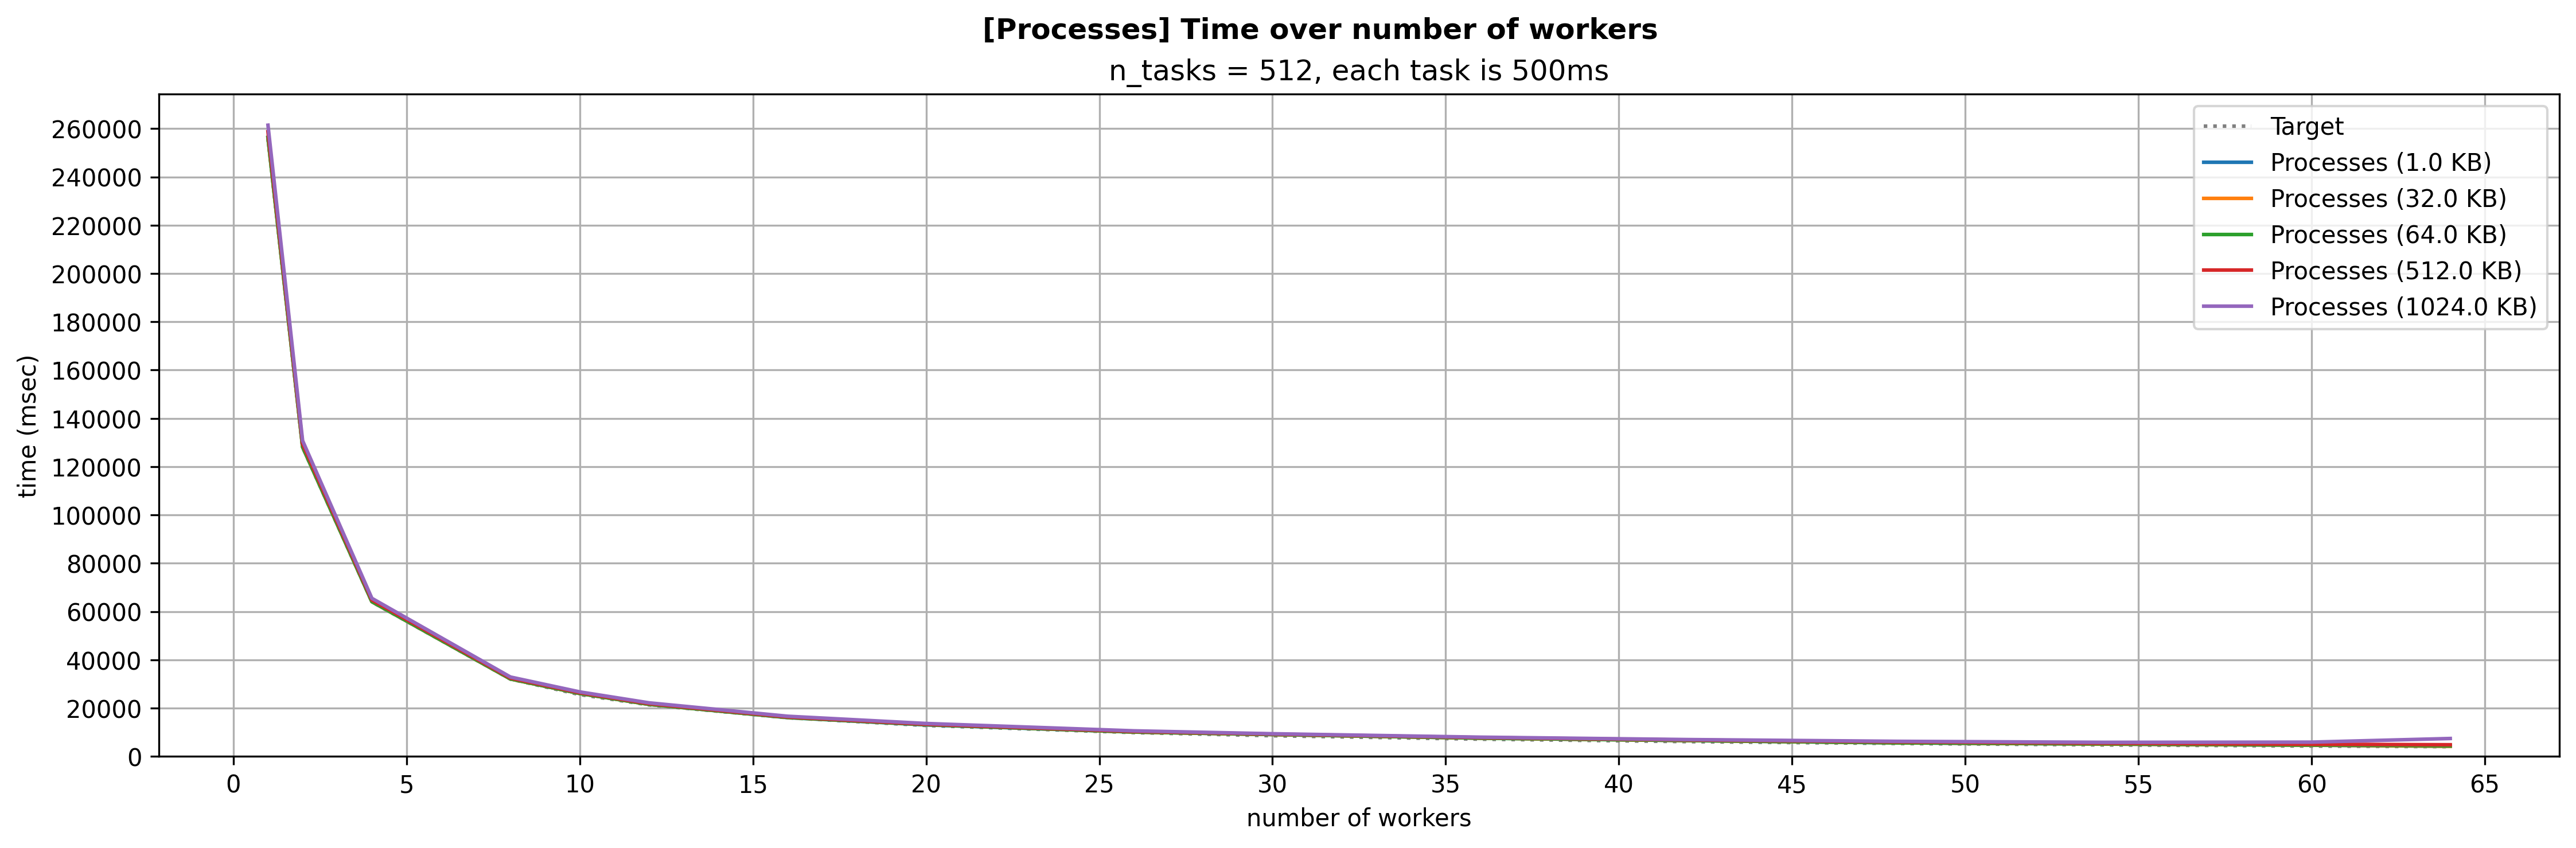

In [3]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
axs.grid()
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
plt.locator_params(axis='y', nbins=24)
plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")
for res in processes:
    plt.plot(x_axis_workers, res[1], label=f"Processes ({res[0] / 1024} KB)")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")
axs.set_ylim(ymin=0)

plt.suptitle('[Processes] Time over number of workers', y=0.97, fontweight="bold")
plt.title(subtitle)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Subinterpreters

In [4]:
subinterpreters = [
    [1024, [256150.761, 128112.815, 64116.01, 32148.042, 26115.724, 21649.89, 16213.875, 13194.19, 10244.476, 9132.88, 7662.439, 6673.092, 5867.351, 5354.636, 4881.391, 4650.632]],
    [32768, [256277.81, 128179.691, 64154.661, 32176.276, 26108.258, 21677.784, 16230.031, 13243.47, 10264.126, 9128.506, 7729.86, 6677.747, 6011.392, 5368.185, 5112.662, 4664.862]],
    [65536, [256396.581, 128240.612, 64184.645, 32175.551, 26158.938, 21678.591, 16239.943, 13251.831, 10308.191, 9127.299, 7786.653, 6675.228, 5884.455, 5369.762, 4908.391, 4655.038]],
    [524288, [258291.061, 129217.872, 64682.508, 32445.915, 26346.541, 21865.637, 16400.925, 13363.509, 10357.772, 9219.686, 7768.092, 6791.928, 6086.35, 5363.639, 4971.929, 4706.586]],
    [1048576, [260457.941, 130290.868, 65264.29, 32798.696, 26576.241, 22133.197, 16560.421, 13474.412, 10482.755, 9312.561, 7929.693, 6864.839, 6037.824, 5462.129, 6105.098, 6034.01]],
]

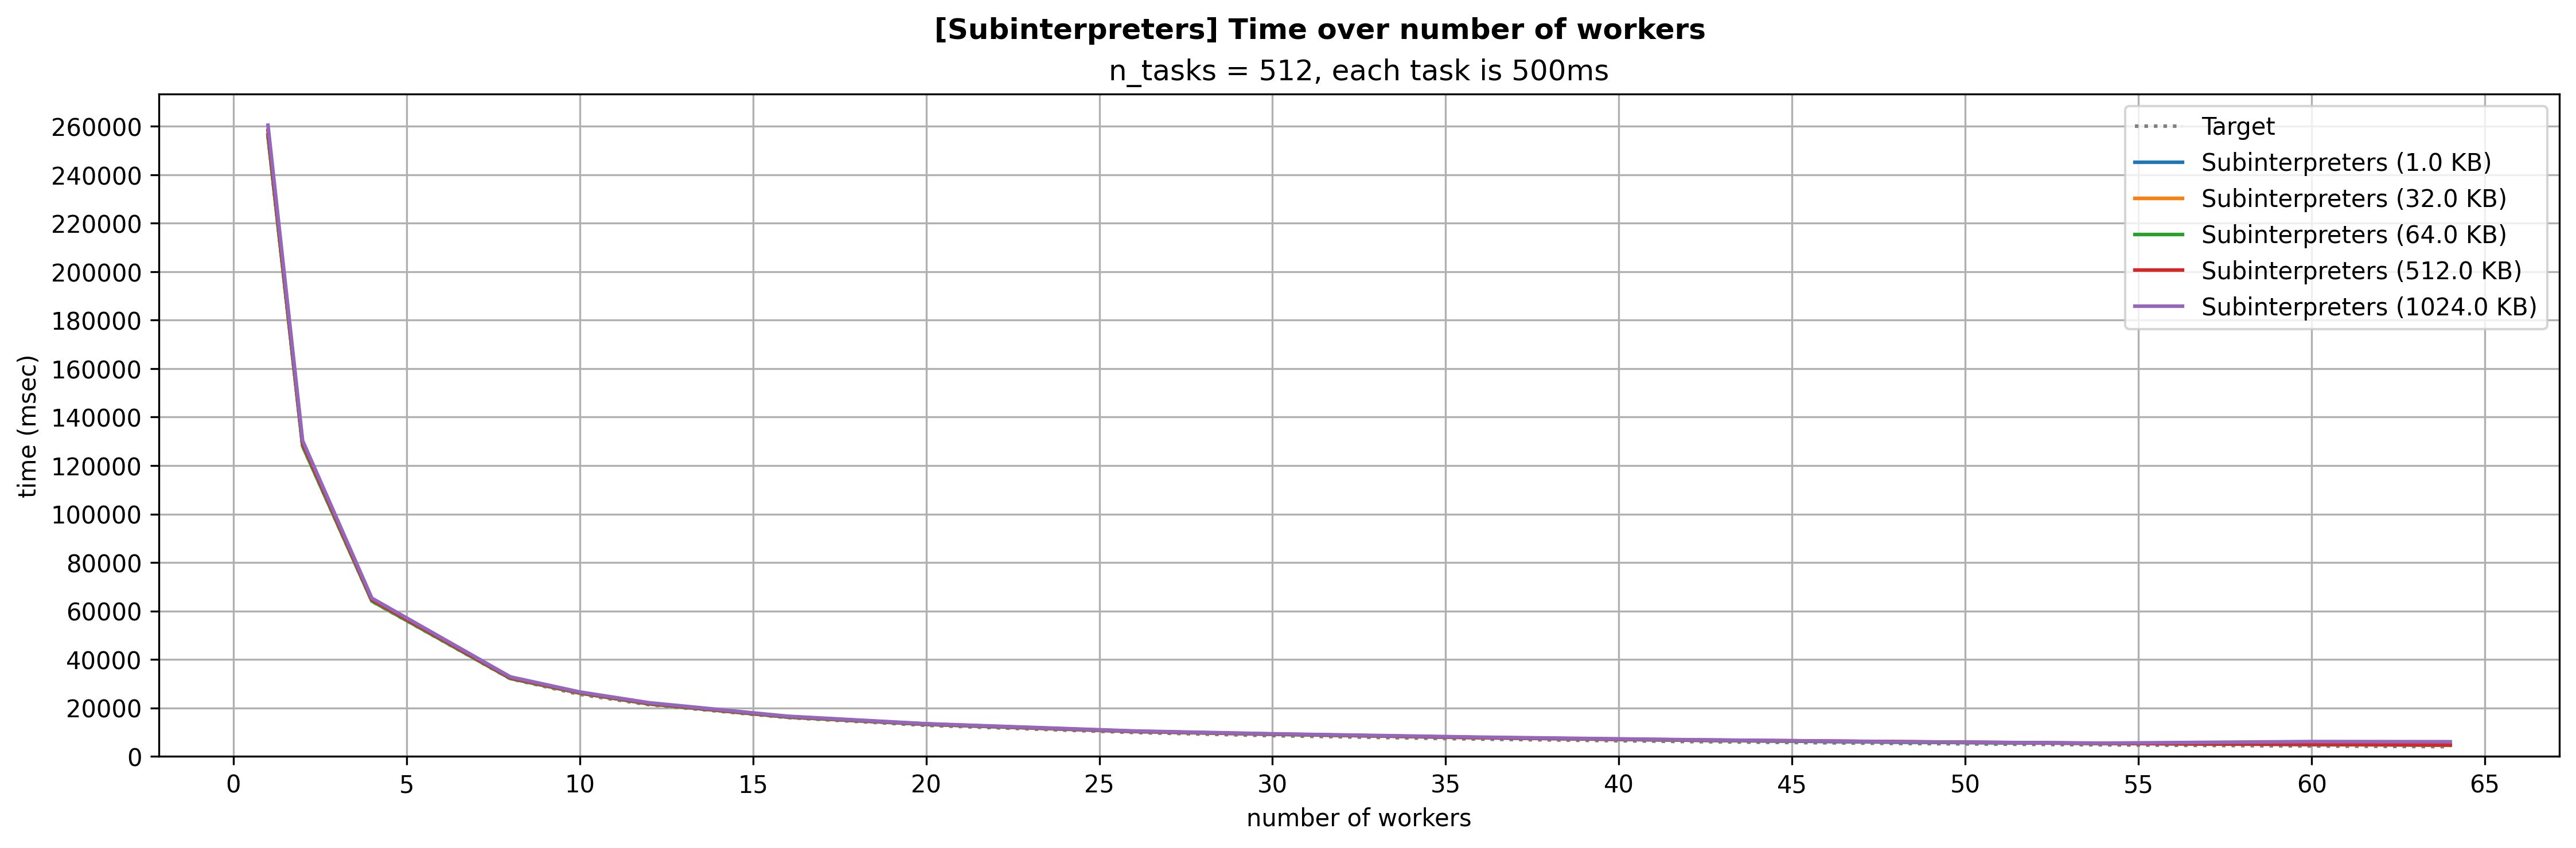

In [5]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
axs.grid()
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
plt.locator_params(axis='y', nbins=24)
plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")
for res in subinterpreters:
    plt.plot(x_axis_workers, res[1], label=f"Subinterpreters ({res[0] / 1024} KB)")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")
axs.set_ylim(ymin=0)

plt.suptitle('[Subinterpreters] Time over number of workers', y=0.97, fontweight="bold")
plt.title(subtitle)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Comparison

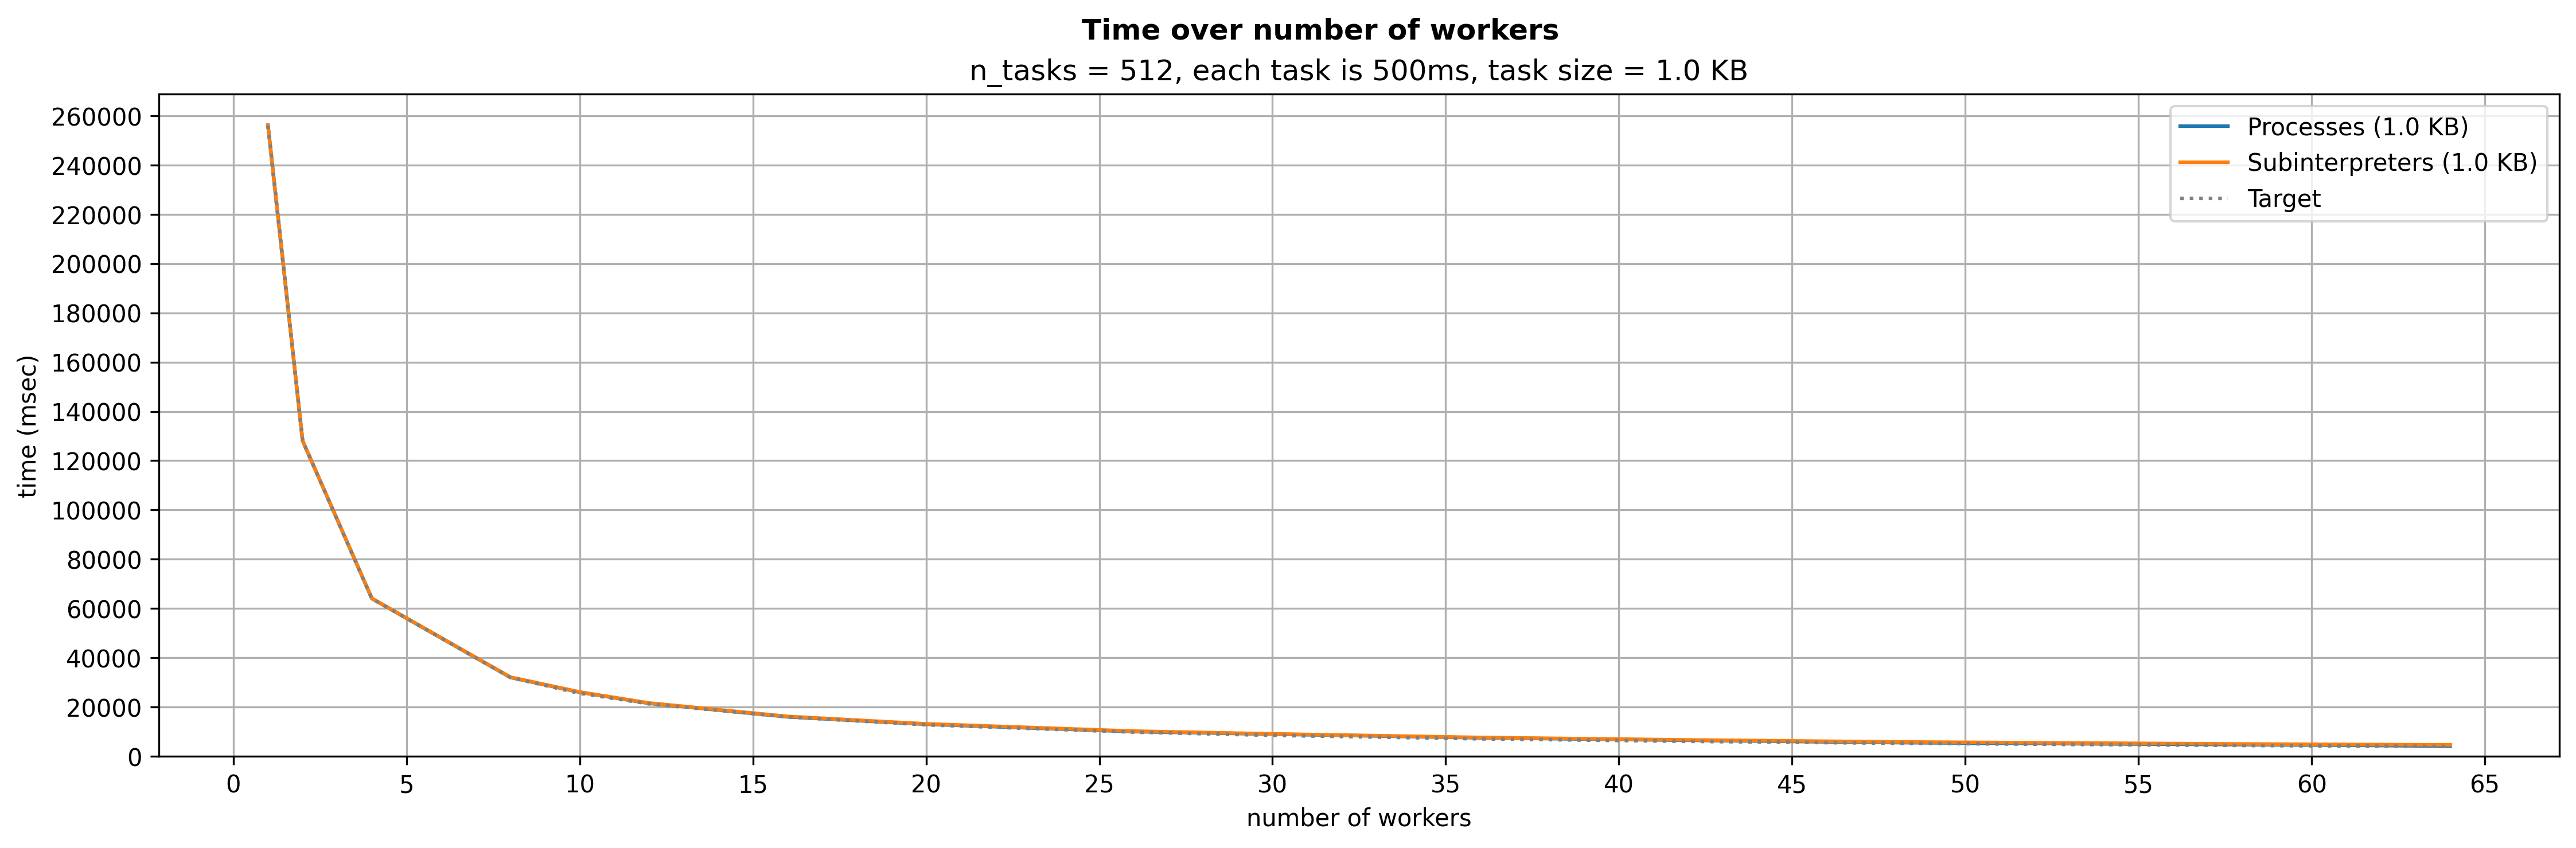

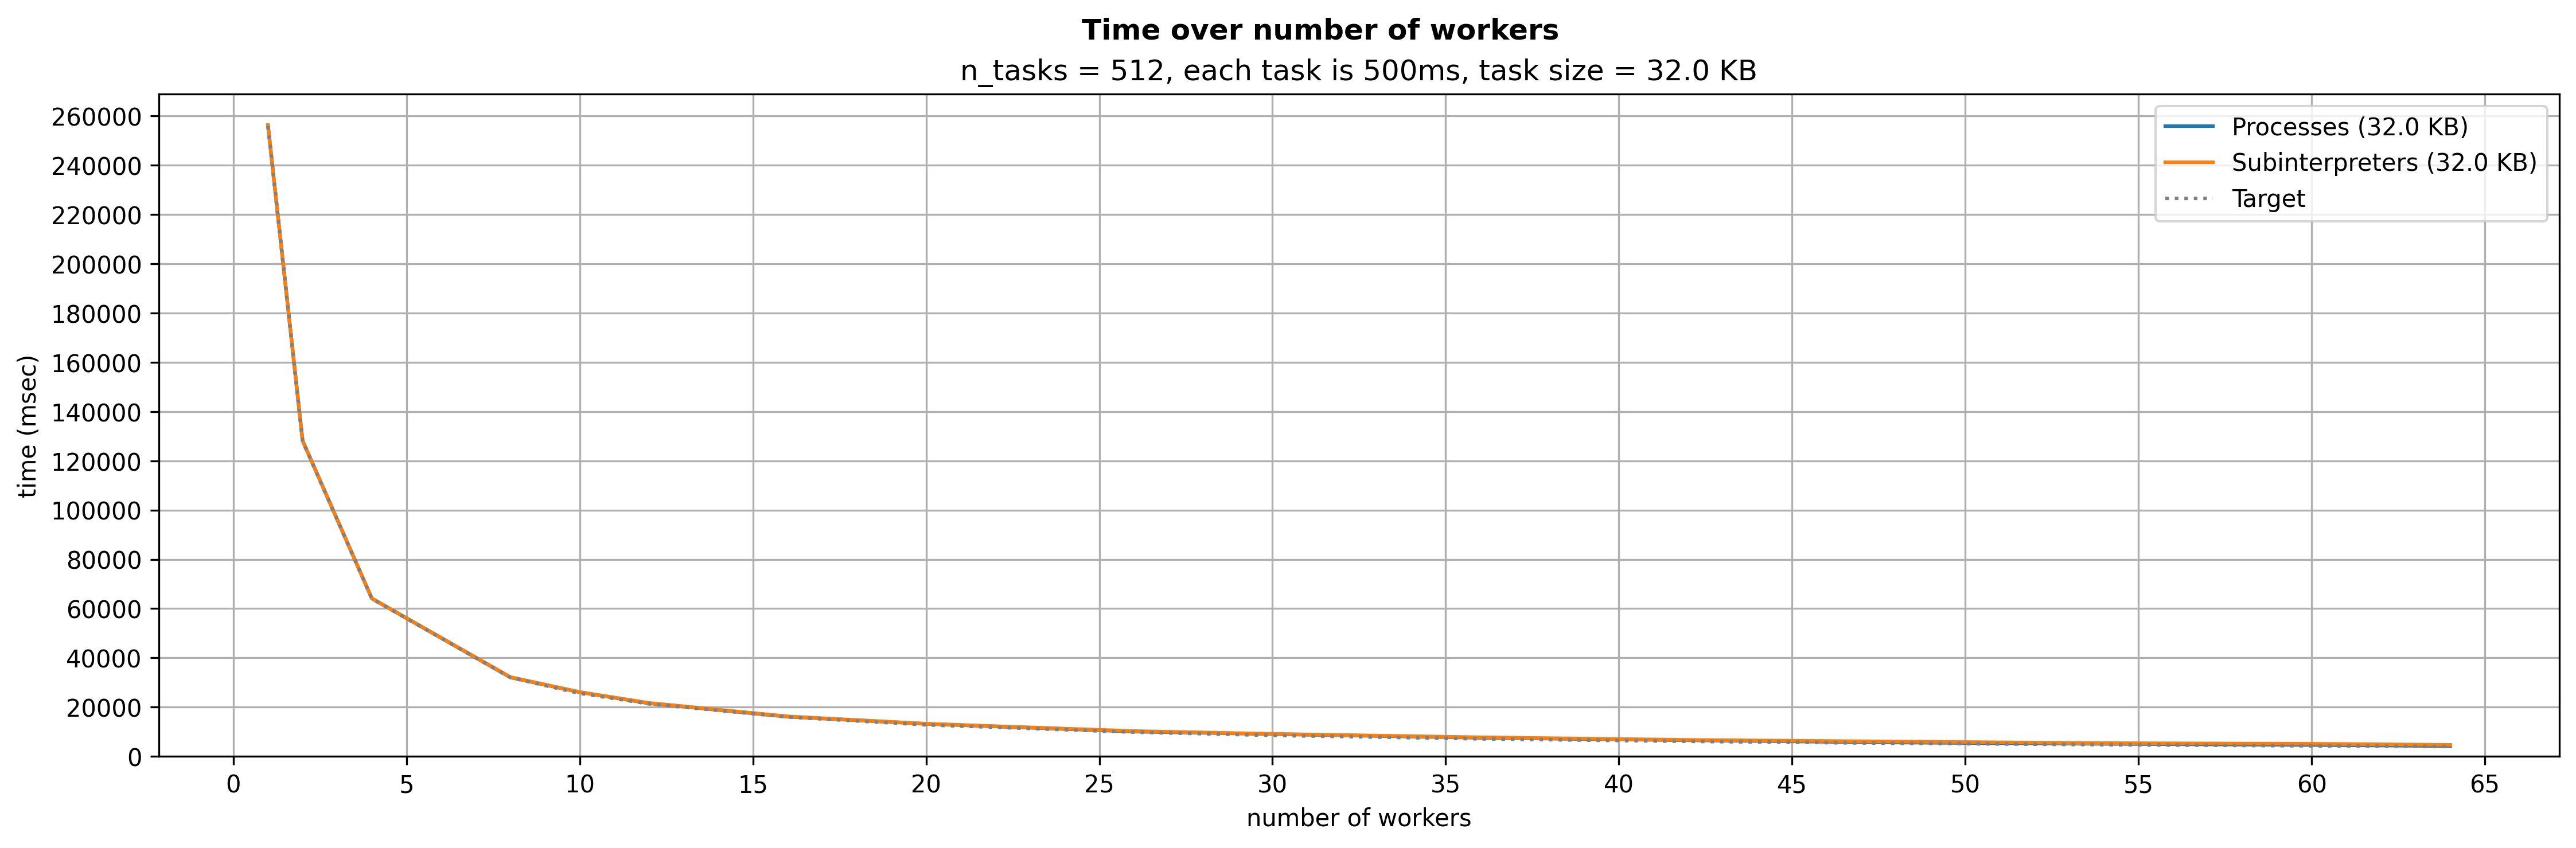

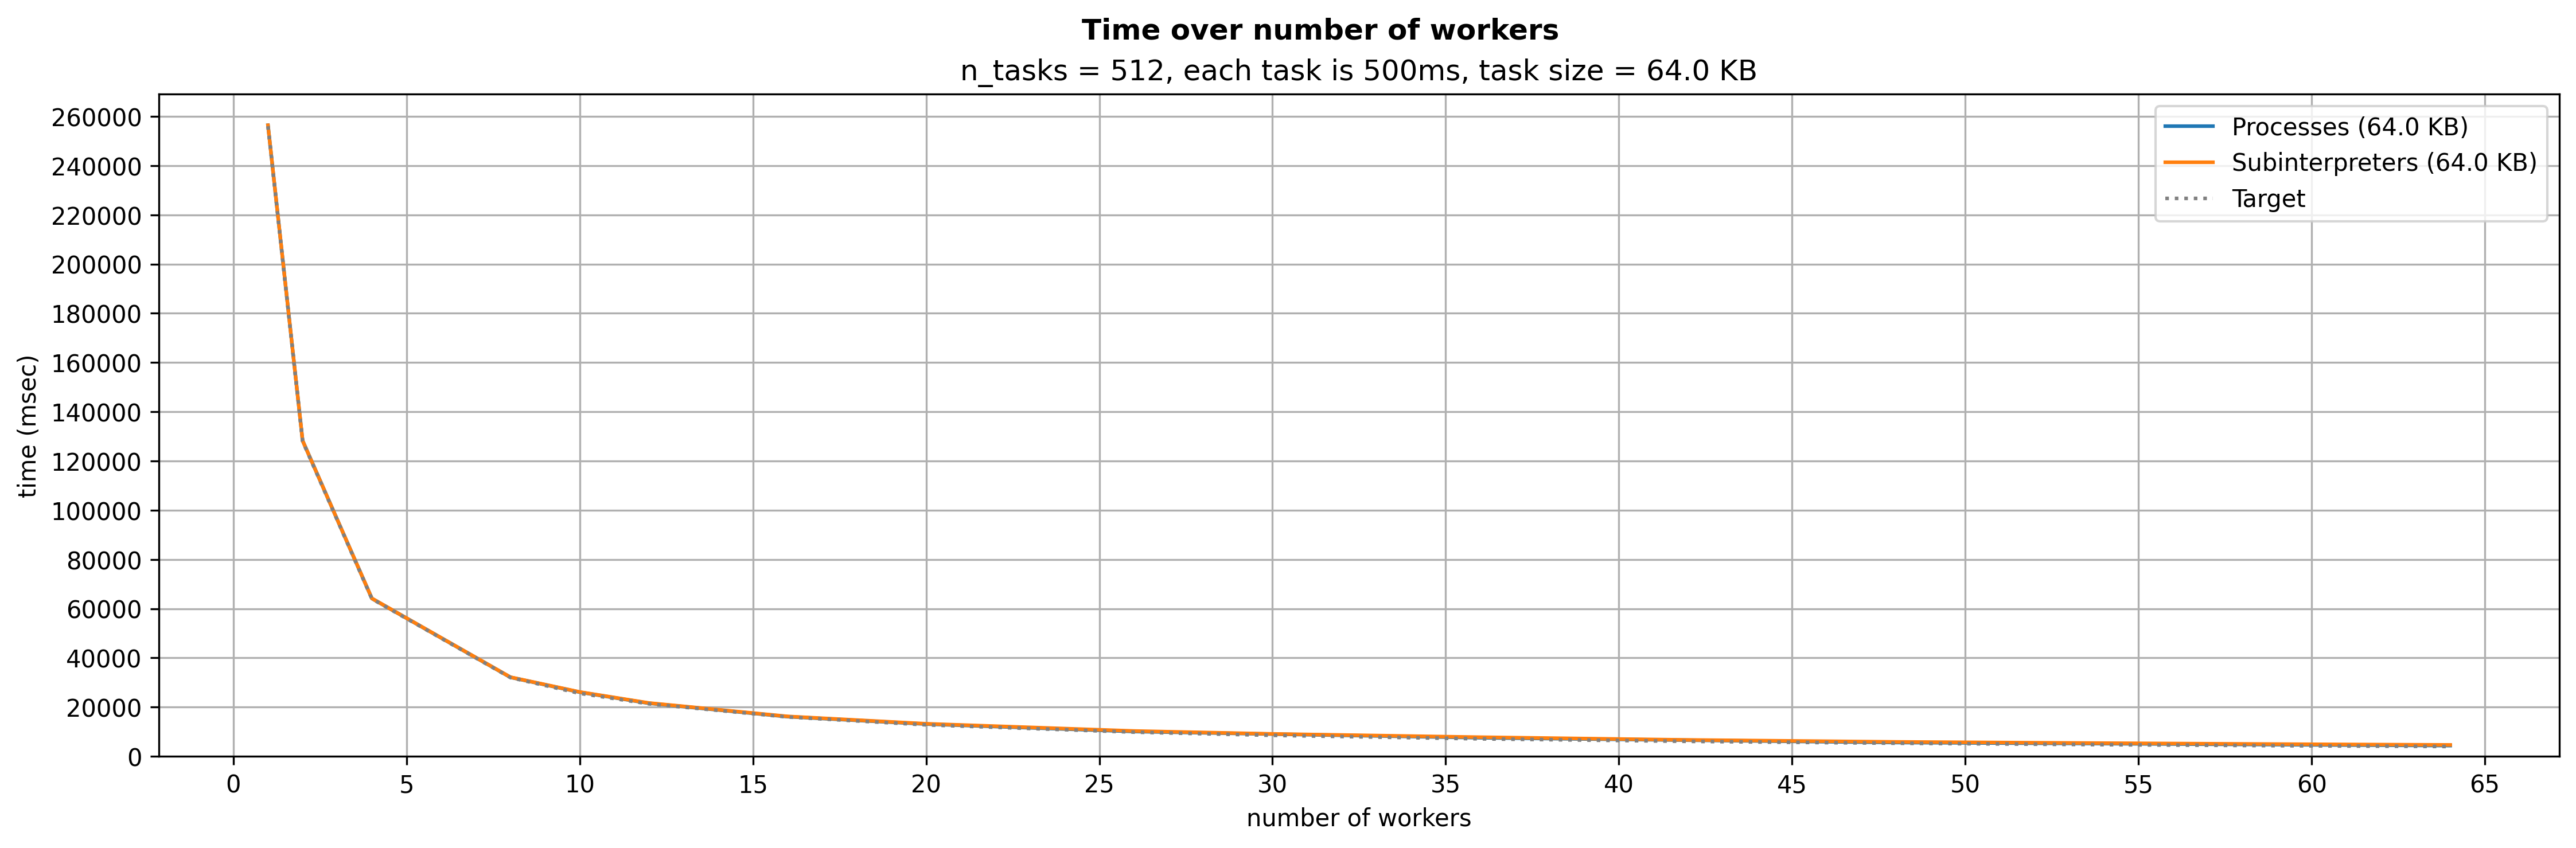

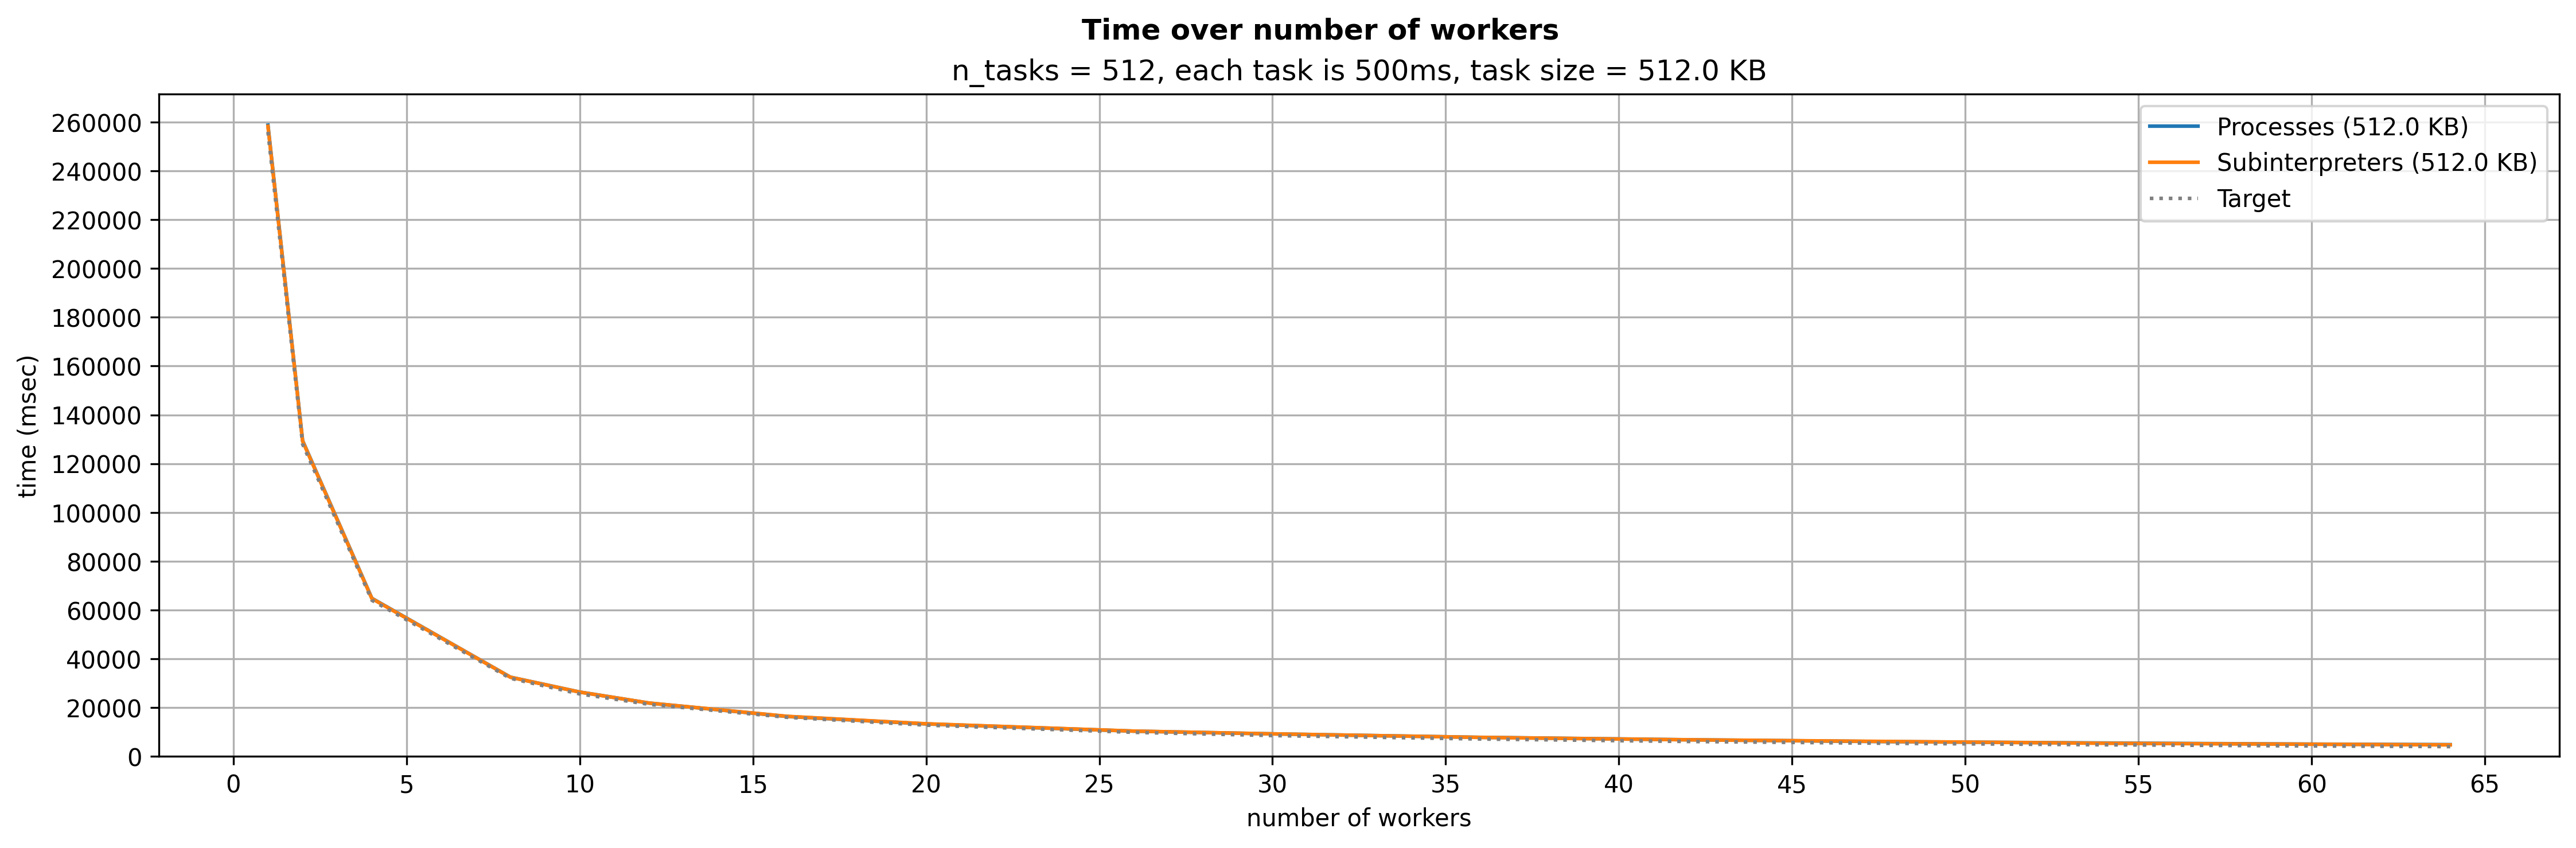

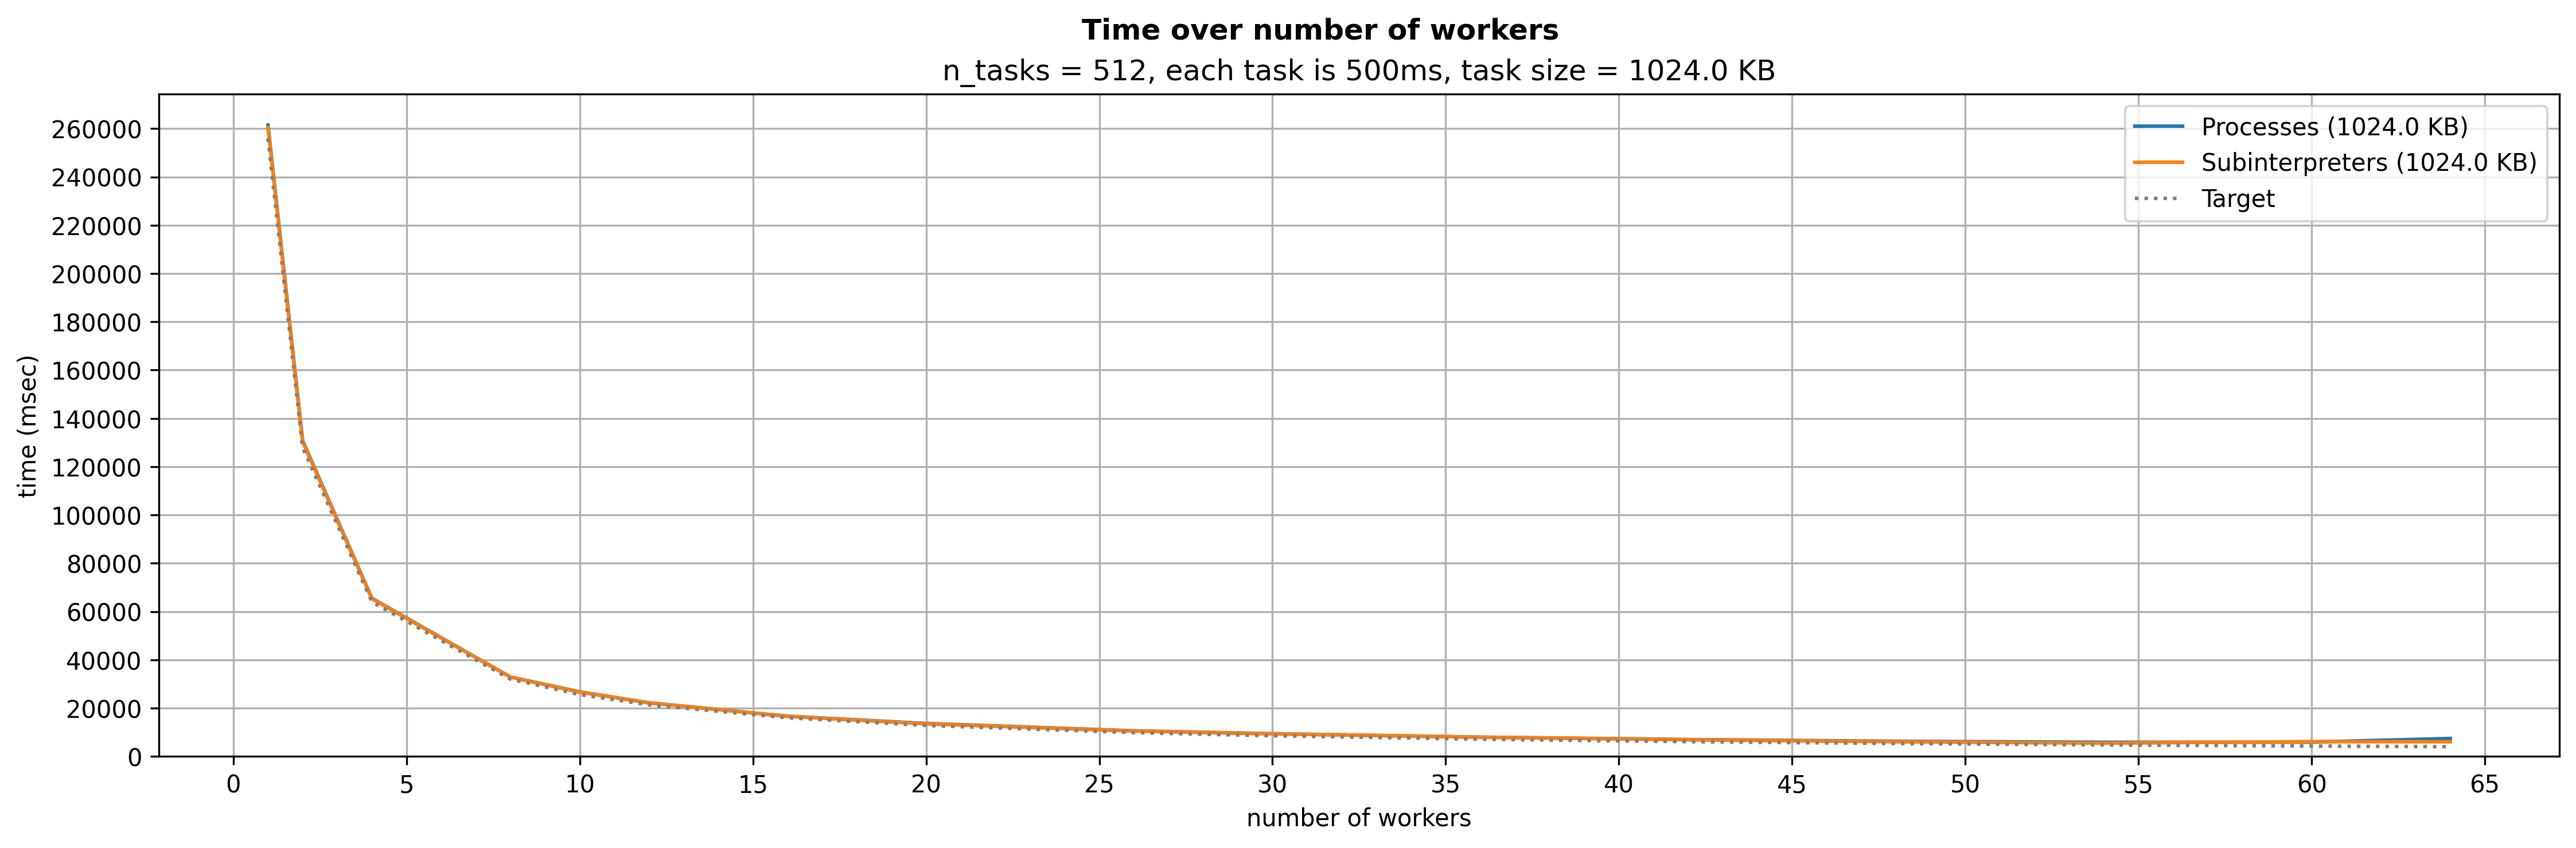

In [6]:
for i in range(len(subinterpreters)):
    fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
    axs.grid()
    # Setting the number of ticks
    plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
    plt.locator_params(axis='y', nbins=24)
    plt.plot(x_axis_workers, processes[i][1], label=f"Processes ({processes[i][0] / 1024} KB)")
    plt.plot(x_axis_workers, subinterpreters[i][1], label=f"Subinterpreters ({subinterpreters[i][0] / 1024} KB)")
    plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")

    axs.set_xlabel("number of workers")
    axs.set_ylabel("time (msec)")
    axs.set_ylim(ymin=0)

    plt.suptitle('Time over number of workers', y=0.97, fontweight="bold")
    plt.title(f"{subtitle}, task size = {processes[i][0] / 1024} KB")
    plt.legend()
    #savefig("stream_service_time")
    plt.show()

In [7]:
"""

processes = []
processes.append([[1], [256139.266]])
processes.append([[1], [256231.633]])
processes.append([[1], [256318.059]])
processes.append([[1], [256514.739]])
processes.append([[1], [257035.511]])
processes.append([[1], [262560.117]])
processes.append([[1], [269011.24]] )
processes.append([[2], [128099.883]])
processes.append([[2], [128129.781]])
processes.append([[2], [128256.916]])
processes.append([[2], [128357.659]])
processes.append([[2], [128616.688]])
processes.append([[2], [132188.944]])
processes.append([[2], [135028.728]])
processes.append([[4], [64057.253]])
processes.append([[4], [64082.351]])
processes.append([[4], [64115.382]] )
processes.append([[4], [64168.386]] )
processes.append([[4], [64297.706]] )
processes.append([[4], [66085.495]] )
processes.append([[4], [68144.888]] )
processes.append([[8], [32080.795]])
processes.append([[8], [32078.738]])
processes.append([[8], [32103.004]] )
processes.append([[8], [32110.535]] )
processes.append([[8], [32243.354]] )
processes.append([[8], [33195.558]] )
processes.append([[8], [35124.548]] )
processes.append([[10], [26042.215]])
processes.append([[10], [26055.655]])
processes.append([[10], [26061.79]] )
processes.append([[10], [26098.912]])
processes.append([[10], [26156.908]])
processes.append([[10], [26940.54]] )
processes.append([[10], [27963.782]])
processes.append([[12], [21574.802]])
processes.append([[12], [21645.925]])
processes.append([[12], [21638.308]])
processes.append([[12], [21719.495]])
processes.append([[12], [21759.073]])
processes.append([[12], [22604.031]])
processes.append([[12], [23446.956]])
processes.append([[16], [16062.742]])
processes.append([[16], [16092.582]])
processes.append([[16], [16138.083]])
processes.append([[16], [16220.602]])
processes.append([[16], [16189.892]])
processes.append([[16], [17360.962]])
processes.append([[16], [18199.929]])
processes.append([[20], [13115.875]])
processes.append([[20], [13185.318]])
processes.append([[20], [13106.095]])
processes.append([[20], [13141.234]])
processes.append([[20], [13175.696]])
processes.append([[20], [14233.55]] )
processes.append([[20], [16541.172]])
processes.append([[26], [10159.15]])
processes.append([[26], [10203.308]])
processes.append([[26], [10126.996]])
processes.append([[26], [10325.553]])
processes.append([[26], [10258.26]] )
processes.append([[26], [11031.98]] )
processes.append([[26], [17044.783]])
processes.append([[30], [9023.333]])
processes.append([[30], [9036.581]])
processes.append([[30], [9051.734]] )
processes.append([[30], [9070.569]] )
processes.append([[30], [9147.753]] )
processes.append([[30], [9760.071]] )
processes.append([[30], [17272.342]])
processes.append([[36], [7615.697]])
processes.append([[36], [7691.026]])
processes.append([[36], [7804.245]] )
processes.append([[36], [7736.201]] )
processes.append([[36], [7955.535]] )
processes.append([[36], [8752.395]] )
processes.append([[36], [16999.551]])
processes.append([[42], [6789.55]] )
processes.append([[42], [6985.293]])
processes.append([[42], [7004.847]] )
processes.append([[42], [6901.203]])
processes.append([[42], [7182.333]] )
processes.append([[42], [8920.62]] )
processes.append([[42], [16948.378]])
processes.append([[48], [6031.936]])
processes.append([[48], [5987.8]])
processes.append([[48], [5748.161]] )
processes.append([[48], [5928.126]] )
processes.append([[48], [6011.114]] )
processes.append([[48], [8763.194]] )
processes.append([[48], [16899.552]])
processes.append([[54], [5630.954]])
processes.append([[54], [5432.642]])
processes.append([[54], [5462.253]] )
processes.append([[54], [5405.184]] )
processes.append([[54], [5789.352]] )
processes.append([[54], [8791.203]] )
processes.append([[54], [17884.977]])
processes.append([[60], [4784.63]])
processes.append([[60], [4771.753]])
processes.append([[60], [4911.83]] )
processes.append([[60], [5117.941]] )
processes.append([[60], [4923.861]] )
processes.append([[60], [9392.306]] )
processes.append([[60], [17163.67]] )
processes.append([[64], [4596.393]])
processes.append([[64], [4277.528]])
processes.append([[64], [4295.848]] )
processes.append([[64], [4346.506]] )
processes.append([[64], [4458.535]] )
processes.append([[64], [11439.165]])
processes.append([[64], [24893.447]])

print(processes)
mp = {}
for proc in processes:
    mp[proc[0][0]] = []
for proc in processes:
    mp[proc[0][0]].append(proc[1][0])
print(mp)
final = []
for i in range(7):
    row = []
    final.append(row)
    for nw, res in mp.items():
        row.append(res[i])
print(final)

"""

'\n\nprocesses = []\nprocesses.append([[1], [256139.266]])\nprocesses.append([[1], [256231.633]])\nprocesses.append([[1], [256318.059]])\nprocesses.append([[1], [256514.739]])\nprocesses.append([[1], [257035.511]])\nprocesses.append([[1], [262560.117]])\nprocesses.append([[1], [269011.24]] )\nprocesses.append([[2], [128099.883]])\nprocesses.append([[2], [128129.781]])\nprocesses.append([[2], [128256.916]])\nprocesses.append([[2], [128357.659]])\nprocesses.append([[2], [128616.688]])\nprocesses.append([[2], [132188.944]])\nprocesses.append([[2], [135028.728]])\nprocesses.append([[4], [64057.253]])\nprocesses.append([[4], [64082.351]])\nprocesses.append([[4], [64115.382]] )\nprocesses.append([[4], [64168.386]] )\nprocesses.append([[4], [64297.706]] )\nprocesses.append([[4], [66085.495]] )\nprocesses.append([[4], [68144.888]] )\nprocesses.append([[8], [32080.795]])\nprocesses.append([[8], [32078.738]])\nprocesses.append([[8], [32103.004]] )\nprocesses.append([[8], [32110.535]] )\nprocesse